# Binary Classification

In [29]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer


import warnings
warnings.filterwarnings("ignore")

## Synthetic Problem

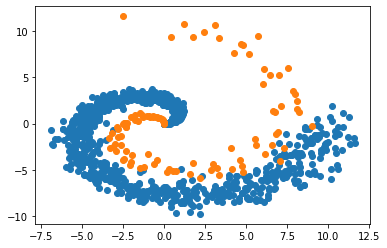

In [2]:
# class 0
n0 = 1000
r0 = np.linspace(0,10,n0)
theta0 = np.linspace(0,2*np.pi,n0)
np.random.seed(100)
x10 = r0 * np.cos(theta0) + r0 * np.random.normal(0, 0.1, n0)
x20 = r0 * np.sin(theta0) + r0 * np.random.normal(0, 0.1, n0)

# convert it to pandas
dataset0 = pd.DataFrame({'x1': x10, 'x2': x20})
dataset0['y'] = 0

# class 1
n1 = 100
r1 = np.linspace(0,10,n1)
theta1 = np.linspace(0,2*np.pi,n1) + 0.5 * np.pi
np.random.seed(100)
x11 = r1 * np.cos(theta1) + r1 * np.random.normal(0, 0.1, n1)
x21 = r1 * np.sin(theta1) + r1 * np.random.normal(0, 0.1, n1)

# convert it to pandas
dataset1 = pd.DataFrame({'x1': x11, 'x2': x21})
dataset1['y'] = 1

plt.scatter(x10, x20)
plt.scatter(x11, x21)

In [3]:
df_total = pd.concat([dataset0, dataset1], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(df_total[['x1', 'x2']], df_total['y'], \
                                                    test_size=0.33, random_state=42, stratify=df_total['y'])

### Method 1: Simple Logistic regression

In [4]:
# logistic regression
logisticReg = LogisticRegression().fit(X_train, y_train)

# make prediction
yhat_train = logisticReg.predict(X_train)
yhat_test = logisticReg.predict(X_test)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(logisticReg.score(X_train, y_train)))
print('testing accuracy by the score function = {}'.format(logisticReg.score(X_test, y_test)))

training accuracy by the score function = 0.9090909090909091
testing accuracy by the score function = 0.9090909090909091


In [5]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       670
           1       0.00      0.00      0.00        67

    accuracy                           0.91       737
   macro avg       0.45      0.50      0.48       737
weighted avg       0.83      0.91      0.87       737



Testing Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       330
           1       0.00      0.00      0.00        33

    accuracy                           0.91       363
   macro avg       0.45      0.50      0.48       363
weighted avg       0.83      0.91      0.87       363



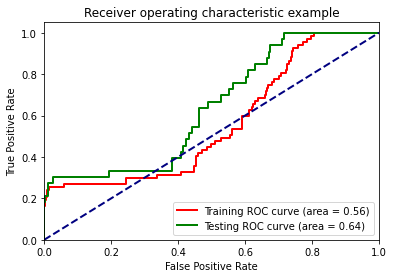

In [6]:
# logistic regression
y_score_train = logisticReg.decision_function(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)


y_score_test = logisticReg.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(
    fpr_train,
    tpr_train,
    color="red",
    lw=lw,
    label="Training ROC curve (area = %0.2f)" % roc_auc_train,
)

plt.plot(
    fpr_test,
    tpr_test,
    color="green",
    lw=lw,
    label="Testing ROC curve (area = %0.2f)" % roc_auc_test,
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

(-9.0, 12.5)

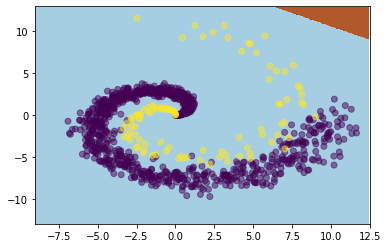

In [7]:
#### create the grid #####

# define the x and y scale
x1min, x1max, x2min, x2max = -9, 12.5, -13, 13
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = logisticReg.predict(grid)

# reshape predictions
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(df_total['x1'], df_total['x2'], c=df_total['y'], alpha=0.5)
plt.ylim([x2min, x2max])
plt.xlim([x1min, x1max])

### Method 2: Logistic regression with feature engineering

In [8]:
PolyFeature = PolynomialFeatures(2)
df_total_PolyFeature = PolyFeature.fit_transform(df_total[['x1', 'x2']])

In [9]:
pd_total_PolyFeature = pd.DataFrame(df_total_PolyFeature)
pd_total_PolyFeature

,0,1,2,3,4,5
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1.0,0.010353,-0.000615,0.000107,-0.000006,3.777768e-07
2,1.0,0.022327,0.000522,0.000498,0.000012,2.728289e-07
3,1.0,0.029267,0.000073,0.000857,0.000002,5.377784e-09
4,1.0,0.043957,0.005411,0.001932,0.000238,2.927354e-05
...,...,...,...,...,...,...
1095,1.0,2.412901,9.911340,5.822093,23.915088,9.823467e+01
1096,1.0,1.761444,9.352248,3.102684,16.473459,8.746454e+01
1097,1.0,1.244228,10.715867,1.548103,13.332981,1.148298e+02
1098,1.0,0.444687,9.285137,0.197747,4.128984,8.621378e+01


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_total_PolyFeature, df_total['y'], \
                                                    test_size=0.33, random_state=42, stratify=df_total['y'])

In [11]:
# logistic regression
logisticReg = LogisticRegression().fit(X_train, y_train)

# make prediction
yhat_train = logisticReg.predict(X_train)
yhat_test = logisticReg.predict(X_test)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(logisticReg.score(X_train, y_train)))
print('testing accuracy by the score function = {}'.format(logisticReg.score(X_test, y_test)))

training accuracy by the score function = 0.9240162822252375
testing accuracy by the score function = 0.9201101928374655


In [12]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       670
           1       1.00      0.16      0.28        67

    accuracy                           0.92       737
   macro avg       0.96      0.58      0.62       737
weighted avg       0.93      0.92      0.90       737



Testing Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       330
           1       1.00      0.12      0.22        33

    accuracy                           0.92       363
   macro avg       0.96      0.56      0.59       363
weighted avg       0.93      0.92      0.89       363



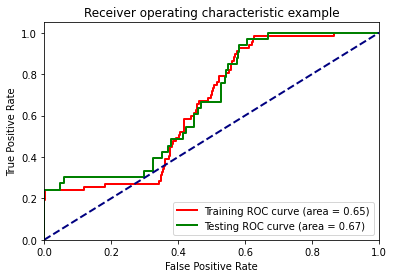

In [13]:
# logistic regression
y_score_train = logisticReg.decision_function(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)


y_score_test = logisticReg.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(
    fpr_train,
    tpr_train,
    color="red",
    lw=lw,
    label="Training ROC curve (area = %0.2f)" % roc_auc_train,
)

plt.plot(
    fpr_test,
    tpr_test,
    color="green",
    lw=lw,
    label="Testing ROC curve (area = %0.2f)" % roc_auc_test,
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

(-9.0, 12.5)

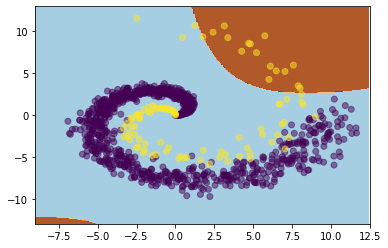

In [14]:
#### create the grid #####

# define the x and y scale
x1min, x1max, x2min, x2max = -9, 12.5, -13, 13
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid_PolyFeature = PolyFeature.transform(grid)

# make predictions for the grid
yhat = logisticReg.predict(grid_PolyFeature)

# reshape predictions
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(df_total['x1'], df_total['x2'], c=df_total['y'], alpha=0.5)
plt.ylim([x2min, x2max])
plt.xlim([x1min, x1max])

### Polynomial Feature with Order Higher than 2

(-9.0, 12.5)

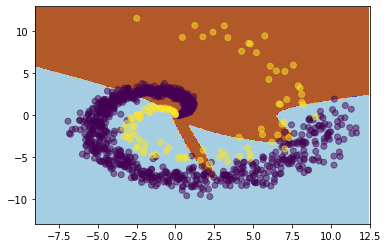

In [15]:
PolyFeature = PolynomialFeatures(11)
df_total_PolyFeature = PolyFeature.fit_transform(df_total[['x1', 'x2']])

X_train, X_test, y_train, y_test = train_test_split(df_total_PolyFeature, df_total['y'], \
                                                    test_size=0.33, random_state=42, stratify=df_total['y'])

# logistic regression
logisticReg = LogisticRegression(C=1).fit(X_train, y_train)

# # make prediction
# yhat_train = logisticReg.predict(X_train)
# yhat_test = logisticReg.predict(X_test)

#### create the grid #####

# define the x and y scale
x1min, x1max, x2min, x2max = -9, 12.5, -13, 13
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid_PolyFeature = PolyFeature.transform(grid)

# make predictions for the grid
yhat = logisticReg.predict(grid_PolyFeature)

# reshape predictions
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(df_total['x1'], df_total['x2'], c=df_total['y'], alpha=0.5)
plt.ylim([x2min, x2max])
plt.xlim([x1min, x1max])

### Method 3: K Nearest Neighbor

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_total[['x1', 'x2']], df_total['y'], \
                                                    test_size=0.33, random_state=42, stratify=df_total['y'])

# knn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# make prediction
yhat_train = neigh.predict(X_train)
yhat_test = neigh.predict(X_test)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(neigh.score(X_train, y_train)))
print('testing accuracy by the score function = {}'.format(neigh.score(X_test, y_test)))

training accuracy by the score function = 0.989145183175034
testing accuracy by the score function = 0.9724517906336089


In [17]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       670
           1       0.95      0.93      0.94        67

    accuracy                           0.99       737
   macro avg       0.97      0.96      0.97       737
weighted avg       0.99      0.99      0.99       737



Testing Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       330
           1       0.96      0.73      0.83        33

    accuracy                           0.97       363
   macro avg       0.97      0.86      0.91       363
weighted avg       0.97      0.97      0.97       363



(-9.0, 12.5)

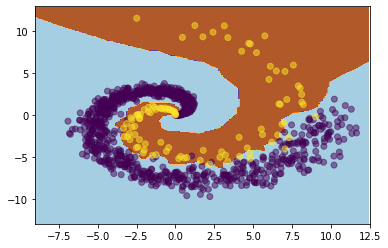

In [18]:
#### create the grid #####

# define the x and y scale
x1min, x1max, x2min, x2max = -9, 12.5, -13, 13
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = neigh.predict(grid)

# reshape predictions
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(df_total['x1'], df_total['x2'], c=df_total['y'], alpha=0.5)
plt.ylim([x2min, x2max])
plt.xlim([x1min, x1max])

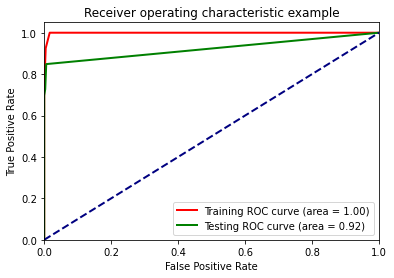

In [20]:
# knn
y_score_train = neigh.predict_proba(X_train)[:,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)


y_score_test = neigh.predict_proba(X_test)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(
    fpr_train,
    tpr_train,
    color="red",
    lw=lw,
    label="Training ROC curve (area = %0.2f)" % roc_auc_train,
)

plt.plot(
    fpr_test,
    tpr_test,
    color="green",
    lw=lw,
    label="Testing ROC curve (area = %0.2f)" % roc_auc_test,
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Method 4: Neural Network

In [24]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
df_total = pd.concat([dataset0, dataset1], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(df_total[['x1', 'x2']], df_total['y'], \
                                                    test_size=0.33, random_state=42, stratify=df_total['y'])


In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=10,verbose=0)

18/18 [==============================] - 0s 2ms/step


(-9.0, 12.5)

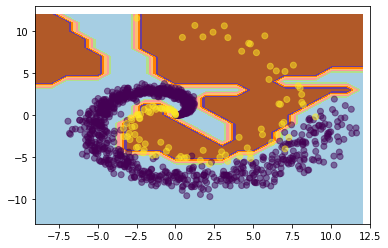

In [27]:
#### create the grid #####

# define the x and y scale
x1min, x1max, x2min, x2max = -9, 12.5, -13, 13
x1grid = np.arange(x1min, x1max, 1)
x2grid = np.arange(x2min, x2max, 1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
yhat_pd = pd.DataFrame(yhat)
yhat_pd['y'] = 0
yhat_pd[yhat_pd[0] > 0.5] = 1

# reshape predictions
zz = yhat_pd['y'].to_numpy().reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(df_total['x1'], df_total['x2'], c=df_total['y'], alpha=0.5)
plt.ylim([x2min, x2max])
plt.xlim([x1min, x1max])

## Breast Cancer Data Set

In [30]:
breast_cancer_data = load_breast_cancer()

# prepare data
data = breast_cancer_data['data']
X = pd.DataFrame(data, columns = breast_cancer_data['feature_names'])
y = pd.DataFrame(breast_cancer_data['target'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=0.33, random_state=42, stratify=y)

In [32]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.051020,0.1850,0.07310,...,14.550,29.16,99.48,639.3,0.13490,0.44020,0.31620,0.11260,0.4128,0.10760
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
62,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
382,12.050,22.72,78.75,447.8,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
239,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,0.05966,...,22.510,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.053750,0.032630,0.1727,0.06317,...,17.800,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
465,13.240,20.13,86.87,542.9,0.08284,0.12230,0.101000,0.028330,0.1601,0.06432,...,15.440,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,13.340,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,0.2131,0.06325,...,19.590,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061


In [33]:
y_train

,0
208,1
46,1
62,0
382,1
239,0
...,...
184,0
465,1
315,1
230,0


### Method: Logistic regression

In [34]:
# logistic regression
logisticReg = LogisticRegression().fit(X_train, y_train)

# make prediction
yhat_train = logisticReg.predict(X_train)
yhat_test = logisticReg.predict(X_test)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(logisticReg.score(X_train, y_train)))
print('testing accuracy by the score function = {}'.format(logisticReg.score(X_test, y_test)))

training accuracy by the score function = 0.9658792650918635
testing accuracy by the score function = 0.9414893617021277


In [35]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       142
           1       0.97      0.97      0.97       239

    accuracy                           0.97       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.97      0.97      0.97       381



Testing Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        70
           1       0.93      0.98      0.95       118

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



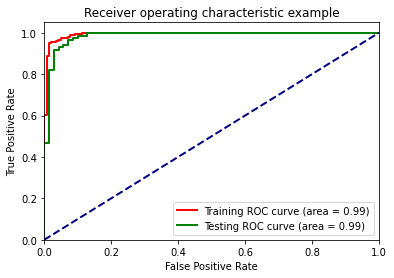

In [37]:
# logistic regression
y_score_train = logisticReg.decision_function(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)


y_score_test = logisticReg.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(
    fpr_train,
    tpr_train,
    color="red",
    lw=lw,
    label="Training ROC curve (area = %0.2f)" % roc_auc_train,
)

plt.plot(
    fpr_test,
    tpr_test,
    color="green",
    lw=lw,
    label="Testing ROC curve (area = %0.2f)" % roc_auc_test,
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Method: KNN

In [38]:
# knn
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

# make prediction
yhat_train = neigh.predict(X_train)
yhat_test = neigh.predict(X_test)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(neigh.score(X_train, y_train)))
print('testing accuracy by the score function = {}'.format(neigh.score(X_test, y_test)))

training accuracy by the score function = 0.9422572178477691
testing accuracy by the score function = 0.9414893617021277


In [39]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       142
           1       0.94      0.97      0.95       239

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



Testing Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        70
           1       0.93      0.97      0.95       118

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



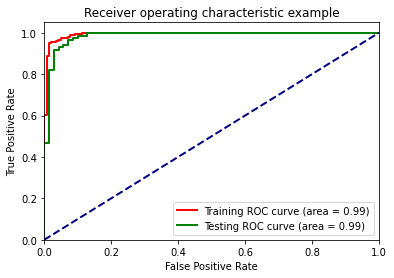

In [41]:
# logistic regression
y_score_train = logisticReg.decision_function(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)


y_score_test = logisticReg.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(
    fpr_train,
    tpr_train,
    color="red",
    lw=lw,
    label="Training ROC curve (area = %0.2f)" % roc_auc_train,
)

plt.plot(
    fpr_test,
    tpr_test,
    color="green",
    lw=lw,
    label="Testing ROC curve (area = %0.2f)" % roc_auc_test,
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()